# QDAC-II trigger chaining


In [1]:
from time import sleep
import numpy
from IPython.display import Image, display
from qcodes_contrib_drivers.drivers.QDevil import QDAC2
qdac_addr = '192.168.8.153'
qdac = QDAC2.QDac2('QDAC', visalib='@py', address=f'TCPIP::{qdac_addr}::5025::SOCKET')
import qcodes.instrument_drivers.rigol.DS1074Z as DS1000Z
rigol_addr = '192.168.8.199'
scope = DS1000Z.DS1074Z('rigol', visalib='@py', address=f'TCPIP::{rigol_addr}::INSTR')

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jps/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jps/.qcodes/logs/211109-9928-qcodes.log
Connected to: QDevil QDAC-II (serial:48762, firmware:5-0.9.26) in 0.38s
Connected to: RIGOL TECHNOLOGIES DS1104Z (serial:DS1ZA171812151, firmware:00.04.03) in 0.06s


In [2]:
qdac.reset()
scope.write('*rst')
sleep(3)

In [3]:
def capture():
    scope.write('stop')
    scope.write(":disp:data?")
    bmpdata = scope.visa_handle.read_raw()[2+9:]
    image = Image(data=bmpdata)
    display(image)

In [4]:
scope.write('chan1:disp off')
scope.write('chan3:disp on')
scope.write('chan3:bwl on')
scope.write('chan3:prob 1')
scope.write('chan3:scal 0.25')
scope.write('chan3:offs -0.5')
scope.write('chan2:disp on')
scope.write('chan2:bwl on')
scope.write('chan2:prob 1')
scope.write('chan2:scal 0.25')
scope.write('chan2:offs -0.5')
scope.write('trig:edge:sour chan2')
scope.write('trig:edge:level 0.25')
scope.write('tim:scal 20e-6')
scope.write('tim:offs 20e-6')

In [5]:
dc_list_3 = qdac.ch03.dc_list(
    voltages=numpy.linspace(0, 1, 11),
    dwell_s=10e-6
)
dc_list_2 = qdac.ch02.dc_list(
    voltages=numpy.linspace(1, 0, 11),
    dwell_s=10e-6
)
qdac.errors()

'0, "No error"'

In [6]:
scope.write('sing')
sleep(3)
qdac.start_all()
qdac.errors()

'0, "No error"'

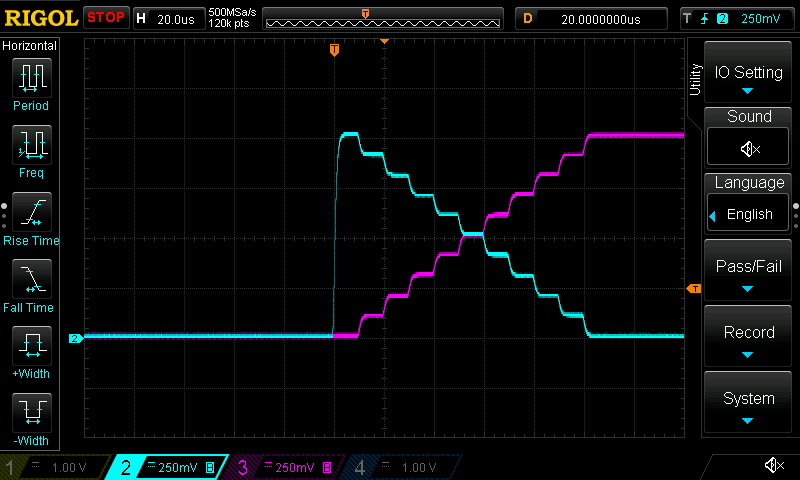

In [7]:
capture()

In [8]:
list2_end = dc_list_2.end_marker()
dc_list_3.start_on(list2_end)
qdac.errors()

'0, "No error"'

In [9]:
scope.write('tim:offs 100e-6')
scope.write('sing')
sleep(3)
qdac.start_all()
qdac.errors()

'0, "No error"'

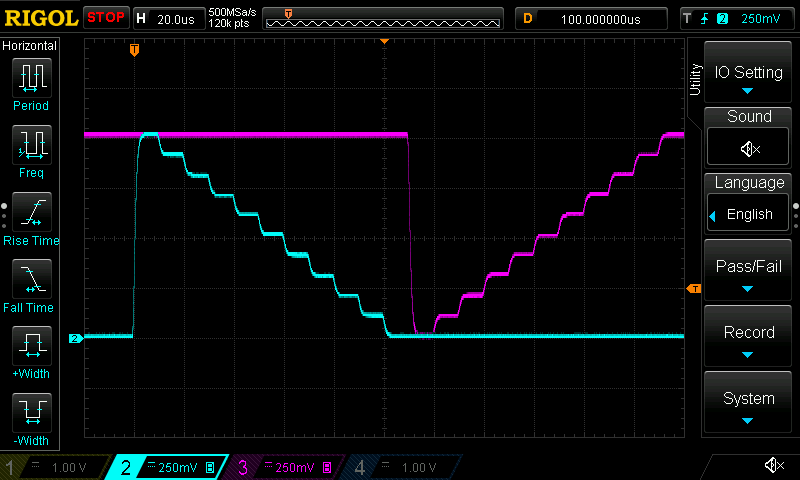

In [10]:
capture()

In [11]:
qdac.reset()
sleep(3)

In [12]:
scope.write('tim:scal 2e-4')
scope.write('tim:offs 10e-4')
square = qdac.ch03.square_wave(frequency_Hz=1e4)
dc_list_2 = qdac.ch02.dc_list(
    voltages=numpy.linspace(1, 0, 11),
    dwell_s=1e-4
)
list2_end = dc_list_2.end_marker()
square.start_on(list2_end)
qdac.errors()

'0, "No error"'

In [13]:
scope.write('sing')
sleep(3)
qdac.start_all()
qdac.errors()

'0, "No error"'

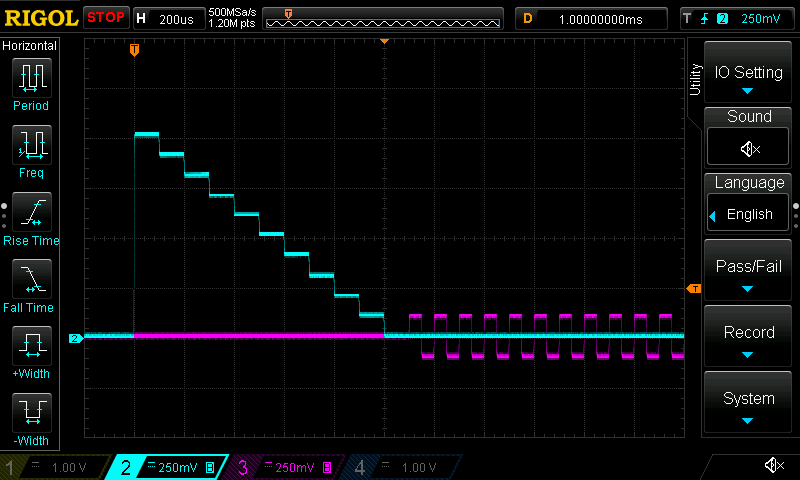

In [14]:
capture()